In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## *Required Libraries*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/data.csv',encoding='ISO-8859-1',names=['target','id','date','flag','user','text']);

### **Data Format**

In [ ]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.tail()

,target,id,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


### **Number of values**

In [ ]:
df.shape

(1600000, 6)

# **From below we can see that there are no null values**
# **So we do not have  to do any data pre-proceessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


# **There are two unique targets**

0  - crosponding  to Negative sentiment

4  - crosponding  to Positive sentiment



In [ ]:
df.target.unique()

array([0, 4])

In [ ]:
unique_targets=df.target.unique()

# From the below graph we can see that data is not biased towards any one target value as both have equal number (800000) of instances

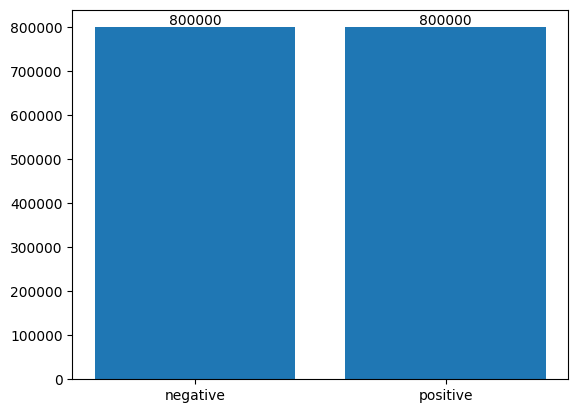

In [ ]:
counts=[]
for i in unique_targets:
    count=len(df[df.target==i])
    counts.append(count)
plt.bar(['negative','positive'],counts)
for i, v in enumerate(counts):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')
plt.show()


## We extracted text and target from the data and split them into a training(80%) and testing(20)% set



In [ ]:
x=df.text.values
y=df.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)

Training data shape: (1280000,) (1280000,)
Testing data shape: (320000,) (320000,)


# We vectorized the training and testing text suing CountVectorizer() function imported from scikit-learn and converted them into index vector form

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train =vectorizer.transform(x_train)
X_test =vectorizer.transform(x_test)

In [ ]:
x_train[1279998]

'Pickin up @misstinayao waitin on @sadittysash 2 hurry up...I odeeee missed dem  Table talk 2nite...LOL bout to be fat...'

In [ ]:
print(X_train)

  (0, 82602)	1
  (0, 105613)	1
  (0, 118421)	1
  (0, 219057)	1
  (0, 256731)	1
  (0, 266582)	1
  (0, 317028)	1
  (0, 372637)	1
  (0, 389701)	1
  (0, 403947)	1
  (0, 421992)	1
  (0, 422367)	1
  (0, 430729)	1
  (0, 436659)	1
  (0, 436682)	1
  (0, 488269)	1
  (0, 516799)	1
  (0, 532083)	1
  (0, 566878)	1
  (0, 577841)	1
  (0, 580061)	1
  (1, 45133)	1
  (1, 69751)	1
  (1, 80528)	1
  (1, 105613)	1
  :	:
  (1279998, 244104)	1
  (1279998, 323110)	1
  (1279998, 357349)	1
  (1279998, 358424)	1
  (1279998, 393266)	1
  (1279998, 396928)	1
  (1279998, 414058)	1
  (1279998, 455519)	1
  (1279998, 508134)	1
  (1279998, 509108)	1
  (1279998, 528547)	1
  (1279998, 546639)	2
  (1279998, 557226)	1
  (1279999, 191765)	1
  (1279999, 201996)	1
  (1279999, 218471)	1
  (1279999, 239706)	1
  (1279999, 250347)	1
  (1279999, 341798)	1
  (1279999, 473749)	1
  (1279999, 484833)	1
  (1279999, 499466)	1
  (1279999, 523154)	1
  (1279999, 528547)	1
  (1279999, 568744)	1


# LogisticRegression() function imported from scikit-learn


In [ ]:
logreg = LogisticRegression(max_iter=1000)


In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logreg.predict(X_test)

NameError: ignored

# Accuracy of Logistic Regression model is 0.799915625

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.799915625


# MultinomialNB() function imported from scikit-learn for Naïve Bayes regression

In [ ]:
NB  =  MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB()

# Accuracy of Naïve Bayes model is 0.780909375

In [ ]:
y_pred = NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.780909375


In [ ]:
import pickle
pickle_out = open('logreg.pkl','wb')
pickle.dump(logreg,pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open('vectorizer.pkl','wb')
pickle.dump(vectorizer,pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open('NB.pkl','wb')
pickle.dump(NB,pickle_out)
pickle_out.close()